## Prediction in Australia

In [35]:
# importing library

import pandas as pd                      # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np                      # linear algebra

# For Data Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [36]:
weather_df = pd.read_csv("weatherAUS.csv")  # reading dataset

## Data Exploration

In [37]:
weather_df.head()  # showing top 5 rows from the dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [38]:
weather_df.shape  # checking rows and columns

(145460, 23)

In [39]:
# describing dataset

weather_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [40]:
weather_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Data Preparation

### Handaling Misssing Values

In [41]:
# checking nulll values in the features

weather_df.isnull().sum()  

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [42]:
# Separating Numerical and categorical features

cat_col = []
num_col = []
for col in weather_df.columns:
    if weather_df[col].dtype == 'O':
        cat_col.append(col)
    else:
        num_col.append(col)

In [43]:
# checking missing values in categorical features

weather_df[cat_col].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [44]:
# each cat_col is filled by most repeated value or mode 

for i in cat_col:
    weather_df[i].fillna(weather_df[i].mode()[0], inplace=True)
    
weather_df[cat_col].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [45]:
# checking missing values in numerical features

weather_df[num_col].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

### Handaling Outliers

<AxesSubplot:>

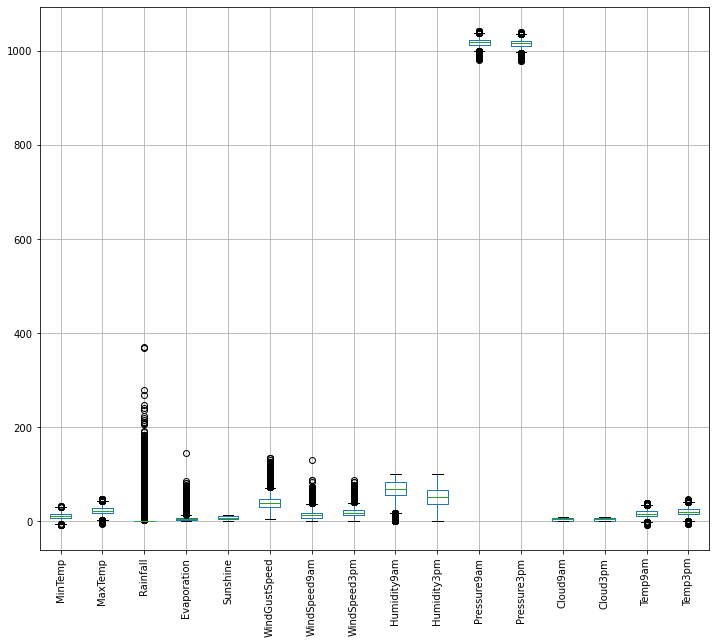

In [46]:
# Checking outliers in numerical features

plt.figure(figsize=(12,10))
weather_df.boxplot(num_col,rot = 90)

<AxesSubplot:>

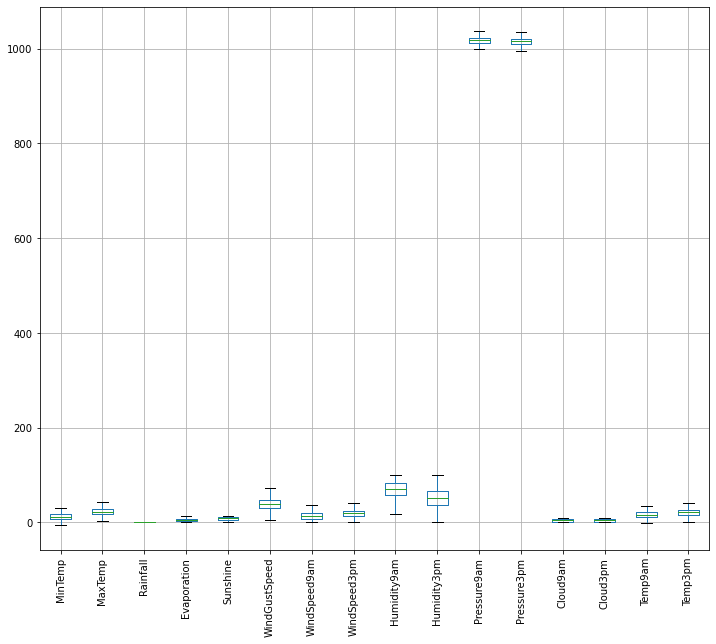

In [47]:
# Removing Outliers from Numerical Features 

features_with_outliers = num_col
for feature in features_with_outliers:
  q1 = weather_df[feature].quantile(0.25)
  q3 = weather_df[feature].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  weather_df.loc[weather_df[feature]<lower_limit, feature] = lower_limit
  weather_df.loc[weather_df[feature]>upper_limit, feature] = upper_limit

plt.figure(figsize=(12,10))
weather_df.boxplot(num_col,rot = 90)

In [48]:
# all missing values imputed by mean

for i in num_col:
    weather_df[i].fillna(weather_df[i].median(), inplace=True)
    
weather_df[num_col].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### Features Selection

In [49]:
for i  in cat_col:
  count = len(weather_df[i].unique())
  print("The Cardinality of each column {} : {} ".format(i,count))

The Cardinality of each column Date : 3436 
The Cardinality of each column Location : 49 
The Cardinality of each column WindGustDir : 16 
The Cardinality of each column WindDir9am : 16 
The Cardinality of each column WindDir3pm : 16 
The Cardinality of each column RainToday : 2 
The Cardinality of each column RainTomorrow : 2 


In [50]:
# drop the original Date variable
weather_df.drop(['Date'], axis = 1, inplace = True)

### Label Encoding

In [51]:
# converting all categorical data into numerical values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
weather_df['WindGustDir'] = le.fit_transform(weather_df['WindGustDir'])
weather_df['Location'] = le.fit_transform(weather_df['Location'])
weather_df['WindDir9am'] = le.fit_transform(weather_df['WindDir9am'])
weather_df['WindDir3pm'] = le.fit_transform(weather_df['WindDir3pm'])
weather_df['RainToday'] = le.fit_transform(weather_df['RainToday'])
weather_df['RainTomorrow'] = le.fit_transform(weather_df['RainTomorrow'])
weather_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


### Plotting correlation matrix

<AxesSubplot:>

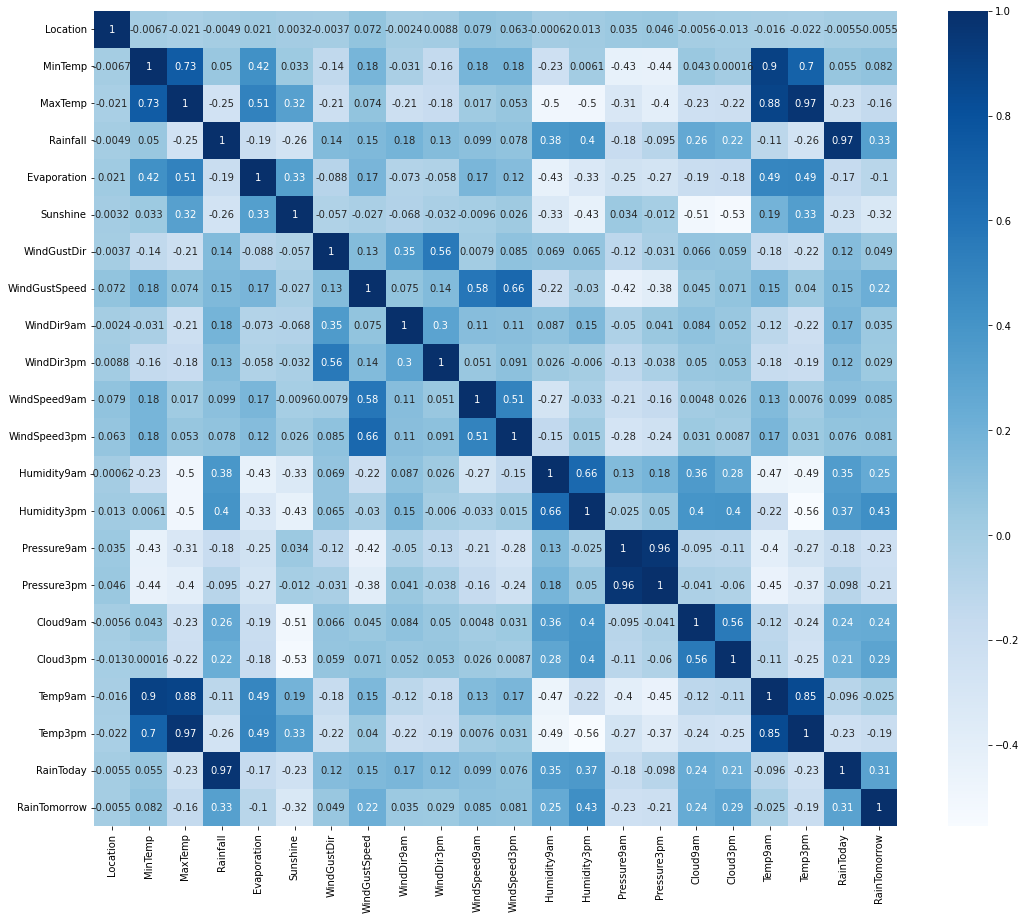

In [52]:
# Correlation Heatmap

corr = weather_df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,cmap='Blues',annot=True)

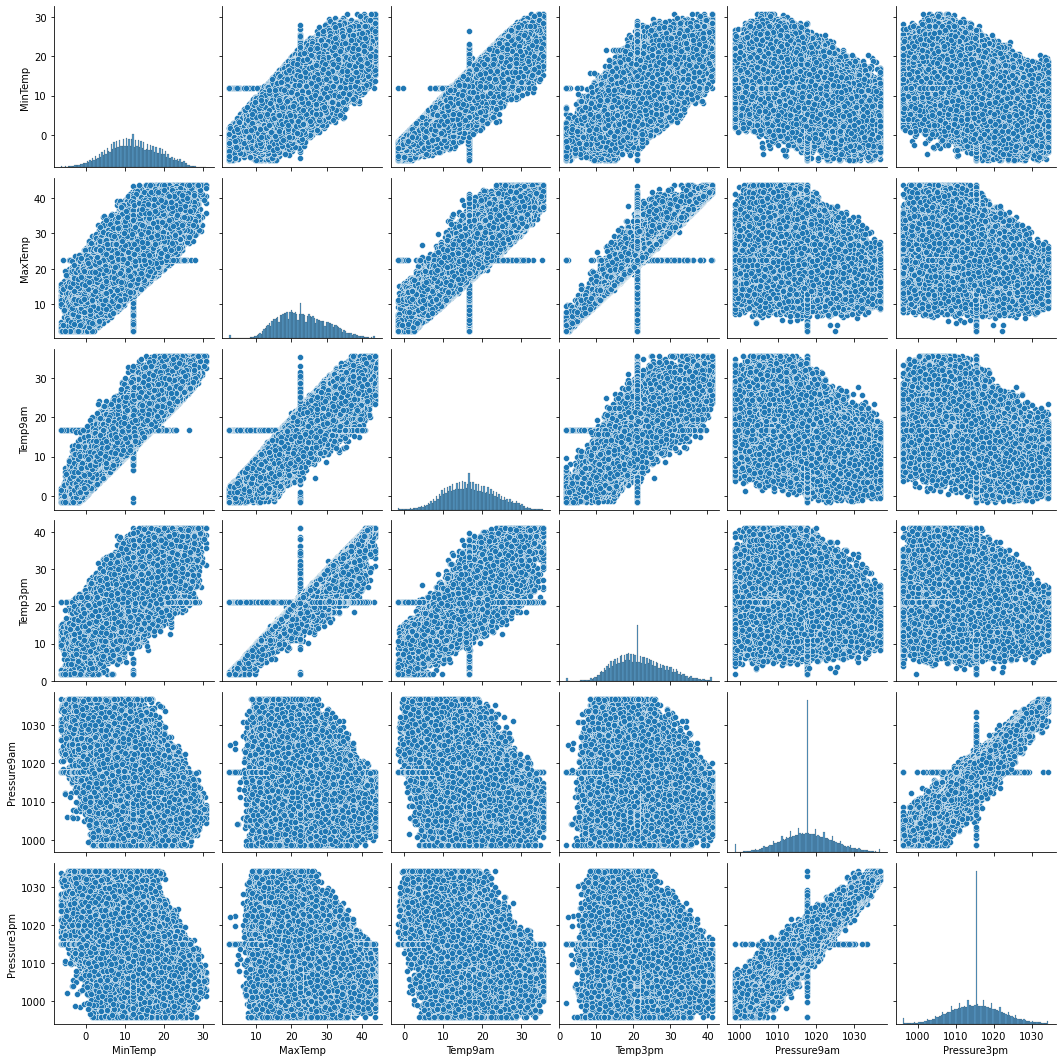

In [53]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm']
sns.pairplot(weather_df[num_var], kind='scatter',diag_kind='hist')

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

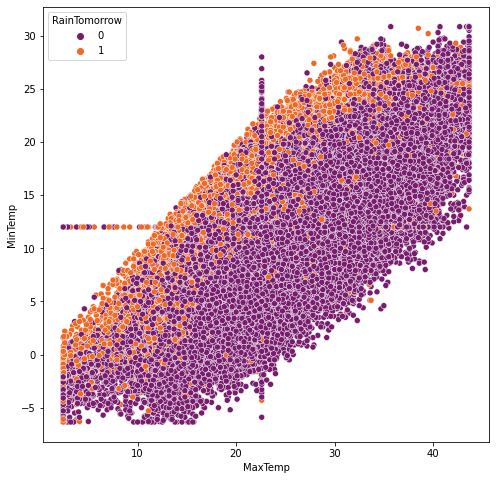

In [54]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = weather_df)

<AxesSubplot:xlabel='MaxTemp', ylabel='Temp3pm'>

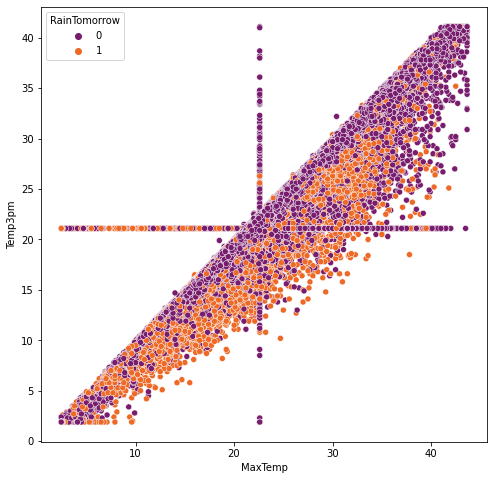

In [55]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'Temp3pm', hue = 'RainTomorrow' , palette = 'inferno',data = weather_df)

<AxesSubplot:xlabel='Temp3pm', ylabel='Temp9am'>

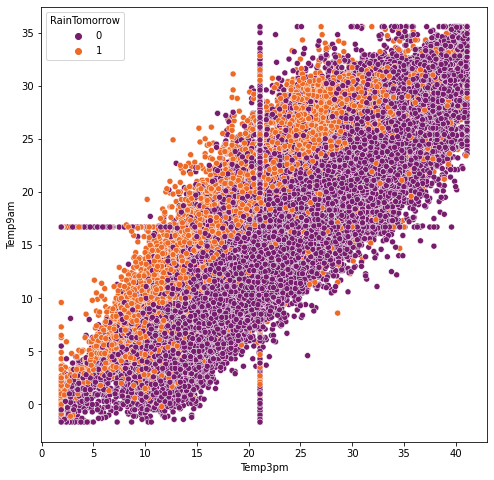

In [56]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Temp3pm', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = weather_df)

<AxesSubplot:xlabel='Pressure3pm', ylabel='Pressure9am'>

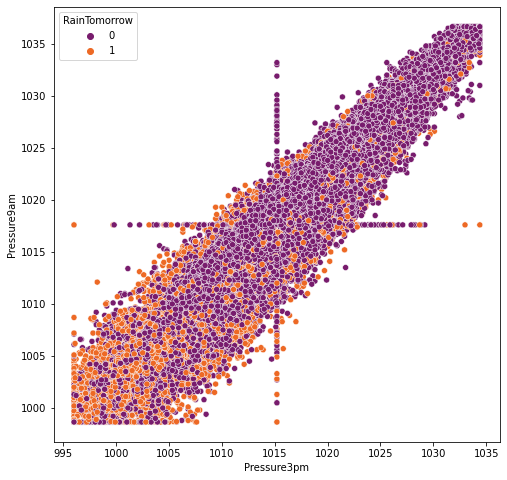

In [57]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Pressure3pm', y = 'Pressure9am', hue = 'RainTomorrow' , palette = 'inferno',data = weather_df)

### Handaling Class Imbalance

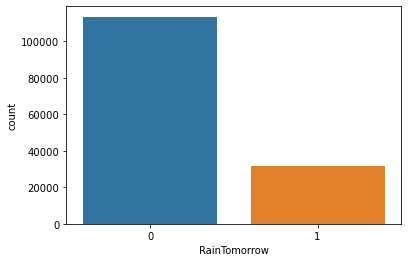

In [58]:
# Exploring Targeted Variable // checking whether the dataset is imbalanced or balanced. 
# If the dataset is imbalanced, we need to undersample majority or oversample minority to balance it.

sns.countplot(weather_df['RainTomorrow'])
plt.show()

We can observe that presence of "0" and "1" are almost in the ratio 4:1. 
So there is a class imbalance and we can to handle it using oversampling. 

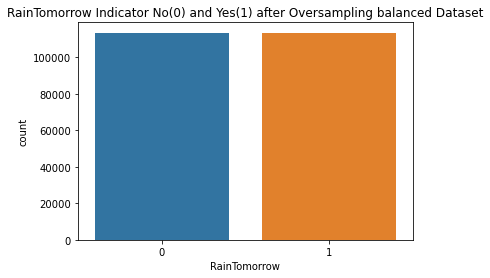

In [72]:
from sklearn.utils import resample

no = weather_df[weather_df.RainTomorrow == 0]
yes = weather_df[weather_df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
weather_df = pd.concat([no, yes_oversampled])

sns.countplot(weather_df['RainTomorrow'])
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling balanced Dataset')
plt.show()

## Train-Test Data Splitting

In [73]:
# preparing data to split into train and test by droping target variable from the dataset 
x = weather_df.drop(['RainTomorrow'], axis = 1)    # indepedent or input 

# putting target variable in y
y = weather_df['RainTomorrow']        # dependent or target 

In [74]:
# Splitting total data into train and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

print("Length of Training Data: {}".format(len(x_train)))
print("Length of Testing Data: {}".format(len(x_test)))

Length of Training Data: 181732
Length of Testing Data: 45434


## Feature Scaling

In [75]:
# Standardizing data using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Model Building 

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [64]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Train Data Score: {}".format(lr.score(x_train, y_train)* 100, 2))
print("Test Data Score: {}".format(lr.score(x_test, y_test)*100, 2))

[[21540  1186]
 [ 3336  3030]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22726
           1       0.72      0.48      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092

Train Data Score: 84.41839681011962
Test Data Score: 84.45620789220403


In [65]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictions = dt.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Train Data Score: {}".format(dt.score(x_train, y_train)*100, 2))
print("Test Data Score: {}".format(dt.score(x_test, y_test)*100, 2))

[[19503  3223]
 [ 3064  3302]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     22726
           1       0.51      0.52      0.51      6366

    accuracy                           0.78     29092
   macro avg       0.69      0.69      0.69     29092
weighted avg       0.79      0.78      0.78     29092

Train Data Score: 99.99226591502818
Test Data Score: 78.38924790320362


In [76]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Train Data Score: {}".format(rf.score(x_train, y_train)*100, 2))
print("Test Data Score: {}".format(rf.score(x_test, y_test)*100, 2))

[[21073  1819]
 [  453 22089]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     22892
           1       0.92      0.98      0.95     22542

    accuracy                           0.95     45434
   macro avg       0.95      0.95      0.95     45434
weighted avg       0.95      0.95      0.95     45434

Train Data Score: 99.98844452270376
Test Data Score: 94.9993397015451


In [69]:
# SVC

from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
predictions = svm.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Train Data Score: {}".format(svm.score(x_train, y_train)*100, 2))
print("Test Data Score: {}".format(svm.score(x_test, y_test)*100, 2))

[[21871   855]
 [ 3430  2936]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     22726
           1       0.77      0.46      0.58      6366

    accuracy                           0.85     29092
   macro avg       0.82      0.71      0.74     29092
weighted avg       0.84      0.85      0.84     29092

Train Data Score: 85.99357211604564
Test Data Score: 85.2708648425684


In [71]:
# KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predictions = knn.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Train Data Score: {}".format(knn.score(x_train, y_train)*100, 2))
print("Test Data Score: {}".format(knn.score(x_test, y_test)*100, 2))

[[21301  1425]
 [ 3367  2999]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22726
           1       0.68      0.47      0.56      6366

    accuracy                           0.84     29092
   macro avg       0.77      0.70      0.73     29092
weighted avg       0.82      0.84      0.82     29092

Train Data Score: 87.92709335899904
Test Data Score: 83.52811769558642
